# Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset

In [2]:
df = pd.read_csv('penguins.csv')

# data preprocessing

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


_________
species , island and sex are non-numeric data
____________

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [7]:
columns = {'sex','island','species'}

for column in columns :
  print(f"unique values of {column} " ,df[column].unique())

unique values of species  ['Adelie' 'Chinstrap' 'Gentoo']
unique values of island  ['Torgersen' 'Biscoe' 'Dream']
unique values of sex  ['MALE' 'FEMALE' nan]


In [8]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(333, 7)

## label encoding

sex : male-0 female-1

species : 'Adelie'=0 'Chinstrap'=1 'Gentoo'=2

island : 'Torgersen'=0 'Biscoe'=1 'Dream'=2

In [12]:
sex_encoding = {'MALE': 0, 'FEMALE': 1}
species_encoding = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
island_encoding = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}

In [13]:
df['sex'] = df['sex'].map(sex_encoding)
df['species'] = df['species'].map(species_encoding)
df['island'] = df['island'].map(island_encoding)

# exploring the data

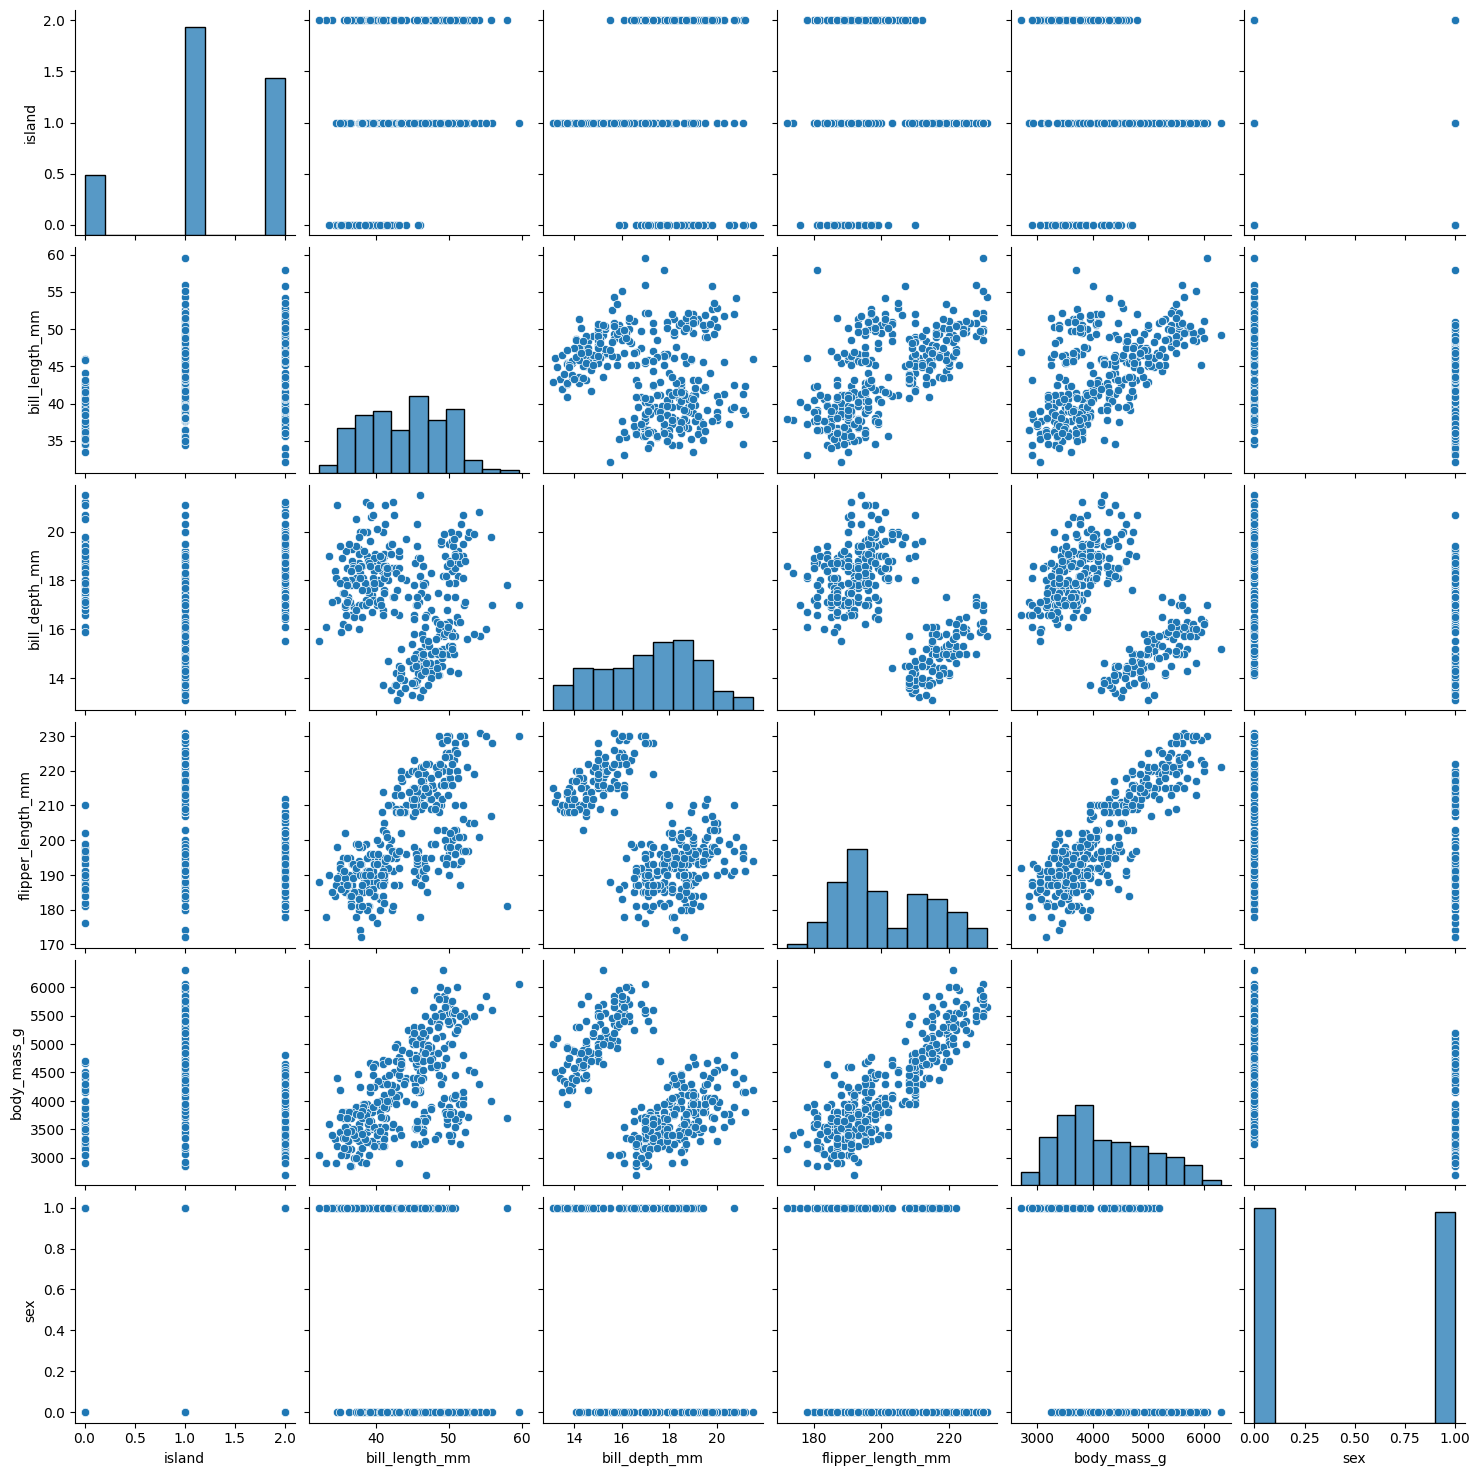

In [19]:
sns.pairplot(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


___________________
dropping the Species column for clustering
__________________

In [ ]:
df=df.drop('species',axis=1)

# applying clustering algorithms

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [18]:
df = pd.DataFrame(df)


In [19]:
df.dropna()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,0
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
4,0,36.7,19.3,193.0,3450.0,1
5,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...
338,1,47.2,13.7,214.0,4925.0,1
340,1,46.8,14.3,215.0,4850.0,1
341,1,50.4,15.7,222.0,5750.0,0
342,1,45.2,14.8,212.0,5200.0,1


In [22]:
df.shape

(333, 6)

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df) # suitable for large dataset
# customer segmentation, image compression, and anomaly detection.

In [25]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(df)


In [26]:
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan_labels = dbscan.fit_predict(df)

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
# Perform PCA for visualization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

Text(0, 0.5, 'PC 2')

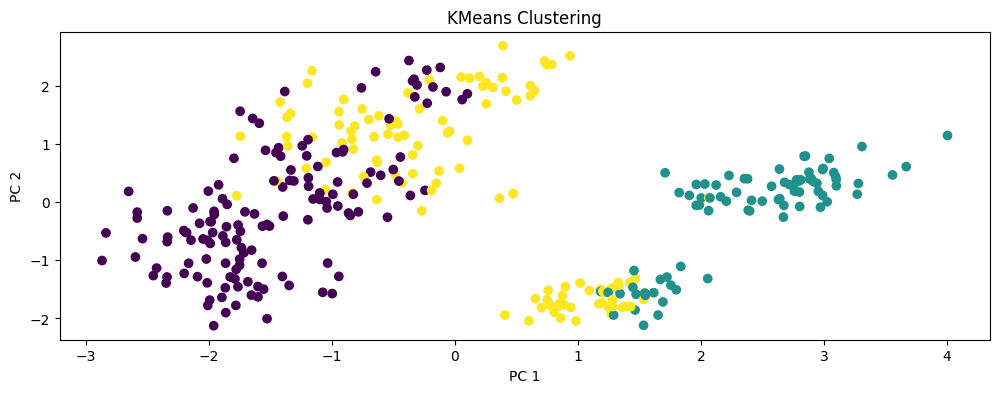

In [29]:
plt.figure(figsize=(12, 4))
plt.title("KMeans Clustering")
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels)
plt.xlabel("PC 1")
plt.ylabel("PC 2")

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_title("KMeans Clustering")
ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=kmeans_labels)
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.set_zlabel("PC 3")
plt.show()

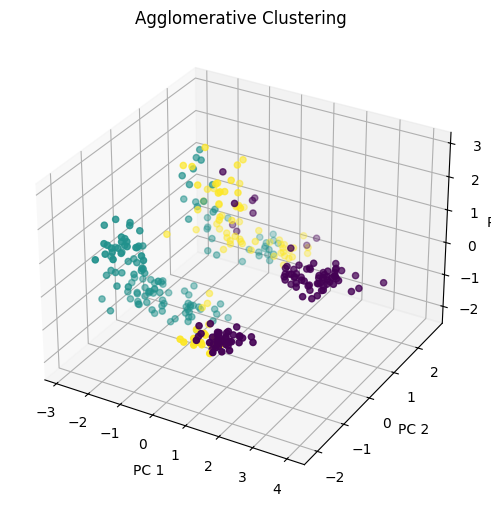

In [32]:
fig = plt.figure(figsize=(8, 6))
ax2 = fig.add_subplot(111, projection='3d')
ax2.set_title("Agglomerative Clustering")
ax2.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=agglomerative_labels)
ax2.set_xlabel("PC 1")
ax2.set_ylabel("PC 2")
ax2.set_zlabel("PC 3")
plt.show()

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

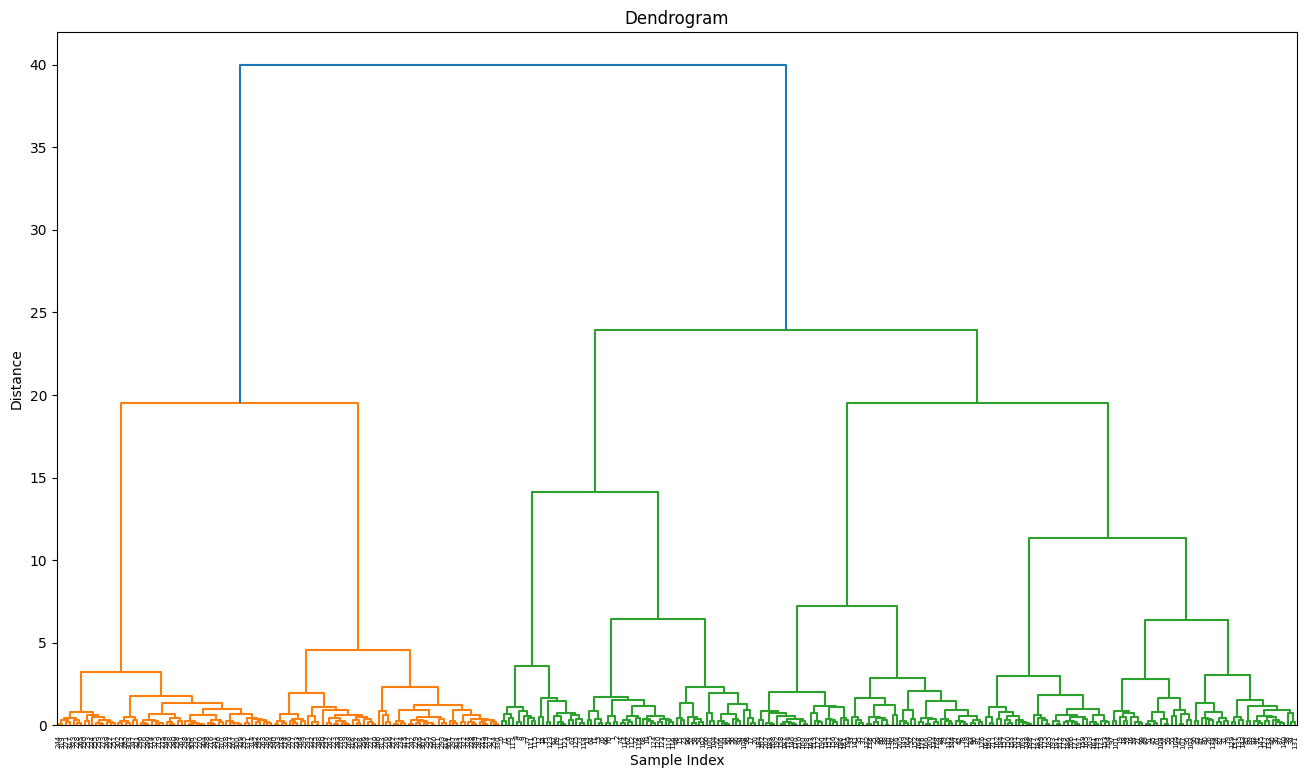

In [45]:
# Perform agglomerative clustering to obtain linkage matrix
Z = linkage(pca_result, method='ward')
# Plot dendrogram
plt.figure(figsize=(16,9))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

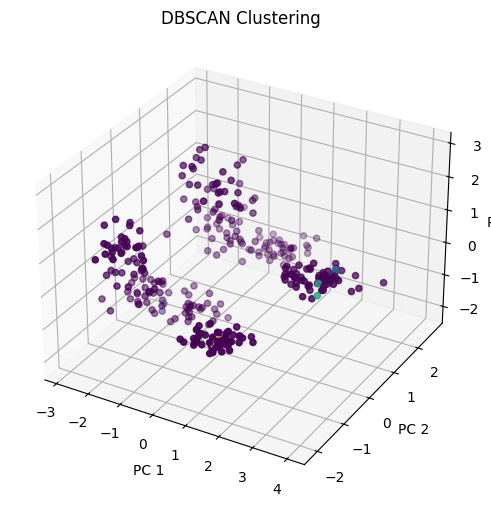

In [33]:
fig = plt.figure(figsize=(8, 6))
ax3 = fig.add_subplot(111, projection='3d')
ax3.set_title("DBSCAN Clustering")
ax3.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=dbscan_labels)
ax3.set_xlabel("PC 1")
ax3.set_ylabel("PC 2")
ax3.set_zlabel("PC 3")
plt.show()

In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Create a DataFrame with encoded data
# data = 
# {
#     'sex_encoded': [0, 1, 0],
#     'species_encoded': [0, 1, 2],
#     'island_encoded': [0, 1, 2]
# }

# df = pd.DataFrame(data)

# Experiment with different values of k
k_values = range(2,4)
silhouette_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(df)

    silhouette = silhouette_score(df, kmeans_labels)
    davies_bouldin = davies_bouldin_score(df, kmeans_labels)

    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Plot the metrics for different values of k
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


ValueError: Number of labels is 3. Valid values are 2 to n_samples - 1 (inclusive)